<a href="https://colab.research.google.com/github/cown0211/boostcourse/blob/main/DataScienceWithPython/5_K_beauty_%EC%98%A8%EB%9D%BC%EC%9D%B8_%ED%8C%90%EB%A7%A4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) K-beauty는 성장하고 있을까? 가설세우기, 데이터 로드, 전처리

## 5.1 국가통계포털 데이터셋 소개

* 데이터: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

* 데이터설명: https://www.narastat.kr/metasvc/index.do?orgId=101&confmNo=101056&kosisYn=Y

* 2014 1사분기 ~ 2019 4사분기 데이터만 활용

## 5.2 데이터셋 로드하기

In [1]:
# 시각화시 한글폰트 깨짐 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 셀 실행 후 런타임 재실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 라이브러리 로드

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 설정

plt.rc("font", family = "NanumBarunGothic") # 글씨체
plt.rc("axes", unicode_minus = False)       # 음수 기호

# 폰트 선명히
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
# 데이터 로드

df_raw = pd.read_csv("/content/drive/MyDrive/boostcourse/DataScienceWithPython/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221115224009.csv",
                 encoding = "cp949")
df_raw.shape

(450, 27)

In [6]:
# 국가(대륙)별 데이터 조회

df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [7]:
# 미국 데이터만 조회

df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,...,791,854,2033,1553,1784,1773,1298,1408,1653,1383
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,...,2575,2394,1737,1716,1723,1886,1845,1837,3166,1787
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,...,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,...,2546,2362,1672,1678,1651,1834,1779,1721,3059,1738
54,미국,소프트웨어,계,47,57,49,128,182,113,163,...,37,125,175,251,172,269,88,156,118,338


## 5.3 데이터 전처리 - tidy data 만들기

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [9]:
df_raw.values

array([['합계', '합계', '계', ..., 1345723, 1526135, 1881628],
       ['합계', '합계', '면세점', ..., 1157158, 1336372, 1655635],
       ['합계', '합계', '면세점 이외', ..., 188565, 189763, 225993],
       ...,
       ['기타', '기 타', '계', ..., 689, 469, 1094],
       ['기타', '기 타', '면세점', ..., 1, 0, 1],
       ['기타', '기 타', '면세점 이외', ..., 688, 469, 1093]], dtype=object)

In [10]:
# 컬럼에 있는 분기별 데이터를 행으로 보냄

df = df_raw.melt(id_vars = ["국가(대륙)별", "상품군별", "판매유형별"] # id, 키가 되어줄 컬럼 지정
                 , var_name = "기간"
                 , value_name = "백만원")
# id_vars를 지정해야 id,키값이 되어줄 컬럼을 그대로 갖다 씀
# 그외의 컬럼은 각 id에 맞는 행으로 들어감 -> 새로운 variable 이라는 컬럼의 레코드가 됨
# 각 컬럼에 맞는 값들은 -> 새로운 value 컬럼으로 들어감

df.shape # 처음 불러온 df_raw와 행,열 수가 바뀜

(10800, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 5.4 데이터 전처리 - 문자열 분리하고 데이터 타입 변경하기

### 기간에서 연도/분기를 분리하기

In [12]:
# 2019 4/4 라는 데이터가 있을 때

print("2019 4/4".split()) # 띄어쓰기를 기준으로 리스트로 반환
print("2019 4/4".split()[0]) # 리스트의 첫번째 요소 반환
print(type("2019 4/4".split()[0])) # 문자열에서 가져온 요소이기 때문에 str 형태
print(type(int("2019 4/4".split()[0]))) # 수치형 변환

['2019', '4/4']
2019
<class 'str'>
<class 'int'>


In [13]:
# lambda와 map 활용하여 연도만 분리

df["연도"] = df["기간"].map(lambda x : int(x.split(".")[0]))
# map은 함수의 일괄적용
# lambda x : x~~  x라는 변수에 대한 함수를 지정

df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [14]:
# 분기만 분리

df["분기"] = df["기간"].map(lambda x : int(x.split(".")[1].split("/")[0]))

df.sample(10)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
7942,중동,의류 및 패션 관련상품,면세점,2018.2/4,0,2018,2
10770,기타,사무·문구,계,2019.4/4,22,2019,4
7473,중동,컴퓨터 및 주변기기,계,2018.1/4,48,2018,1
5165,아세안(ASEAN),음·식료품,면세점 이외,2016.4/4,-,2016,4
96,중국,가전·전자·통신기기,계,2014.1/4,761,2014,1
2628,대양주,음반·비디오·악기,계,2015.2/4,118,2015,2
7839,아세안(ASEAN),소프트웨어,계,2018.2/4,17,2018,2
9235,유럽연합(EU),소프트웨어,면세점,2019.1/4,0,2019,1
8586,합계,농축수산물,계,2018.4/4,56,2018,4
7980,중남미,사무·문구,계,2018.2/4,0,2018,2


### 금액을 수치로 표현하기 위해 데이터 타입 변경

In [15]:
# - 문자를 결측치로 변경

df["백만원"].replace("-", pd.np.nan) # np 안불러왔으면 pd.np로 사용 가능

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


0        148272
1           NaN
2           NaN
3          4915
4           NaN
          ...  
10795         0
10796       531
10797      1094
10798         1
10799      1093
Name: 백만원, Length: 10800, dtype: object

In [16]:
# float 타입으로 변경
# np.nan의 데이터 타입이 float이기 때문에 int가 아닌 float 형식 지정

df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df["백만원"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

### 필요없는 데이터 제거하기

In [17]:
# 국가(대륙)별, 상품군별의 "합계"는 계산으로 구해낼 수 있으므로 삭제

df[(df["국가(대륙)별"] == "합계") | (df["상품군별"] == "합계")]
# ㄴ 이 데이터는 삭제할 데이터

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10711,대양주,합계,면세점,2019.4/4,30.0,2019,4
10712,대양주,합계,면세점 이외,2019.4/4,3250.0,2019,4
10755,기타,합계,계,2019.4/4,25657.0,2019,4
10756,기타,합계,면세점,2019.4/4,13820.0,2019,4


In [18]:
df.info()
# 메모리 사용이 590.8+

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [19]:
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
# 위의 데이터 제거된 DataFrame

df.info()
# 메모리 사용량 567

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [20]:
# 결측치 보기

df.isnull().sum()

# 백만원 컬럼에 3024개 결측치 발견

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# 2) 데이터 시각화로 가설 검정하기

## 5.5 전체 상품군별 데이터로 연도별 증가추세 시각화 하기

### 전체 상품군 판매액

In [21]:
# 판매유형별 데이터는 일부 기간(2016년 이전 데이터)에는 "계"만 존재하기 때문에
# 판매유형별 == "계"만 따로 가져와야 제대로 된 시각화 가능
# df.head() -> 49,50 레코드의 백만원 컬럼이 NaN임

df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


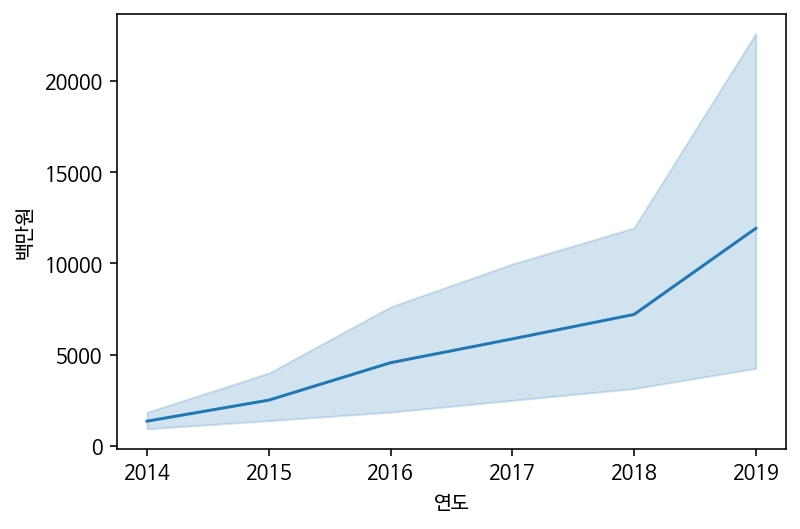

In [22]:
# 연도에 따른 판매액 시각화

sns.lineplot(data = df_total, x = "연도", y = "백만원")

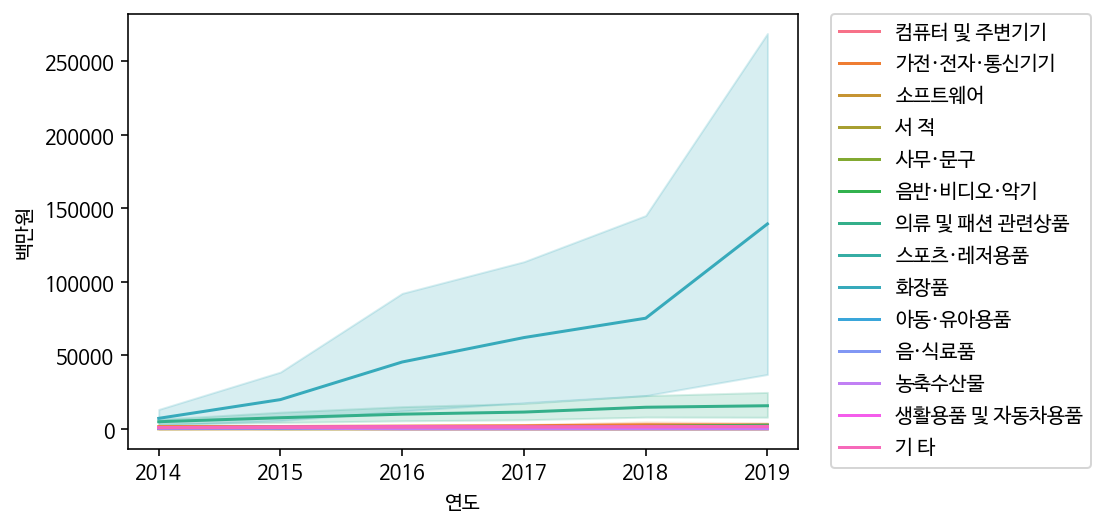

In [23]:
# 연도에 따른 판매액 시각화, 상품군별 다른 색상

sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # legend 위치 조정

# 화장품의 판매액 증가율이 가장 큼
# 화장품 외의 부분은 겹쳐서 구분이 잘 안됨 -> subplot

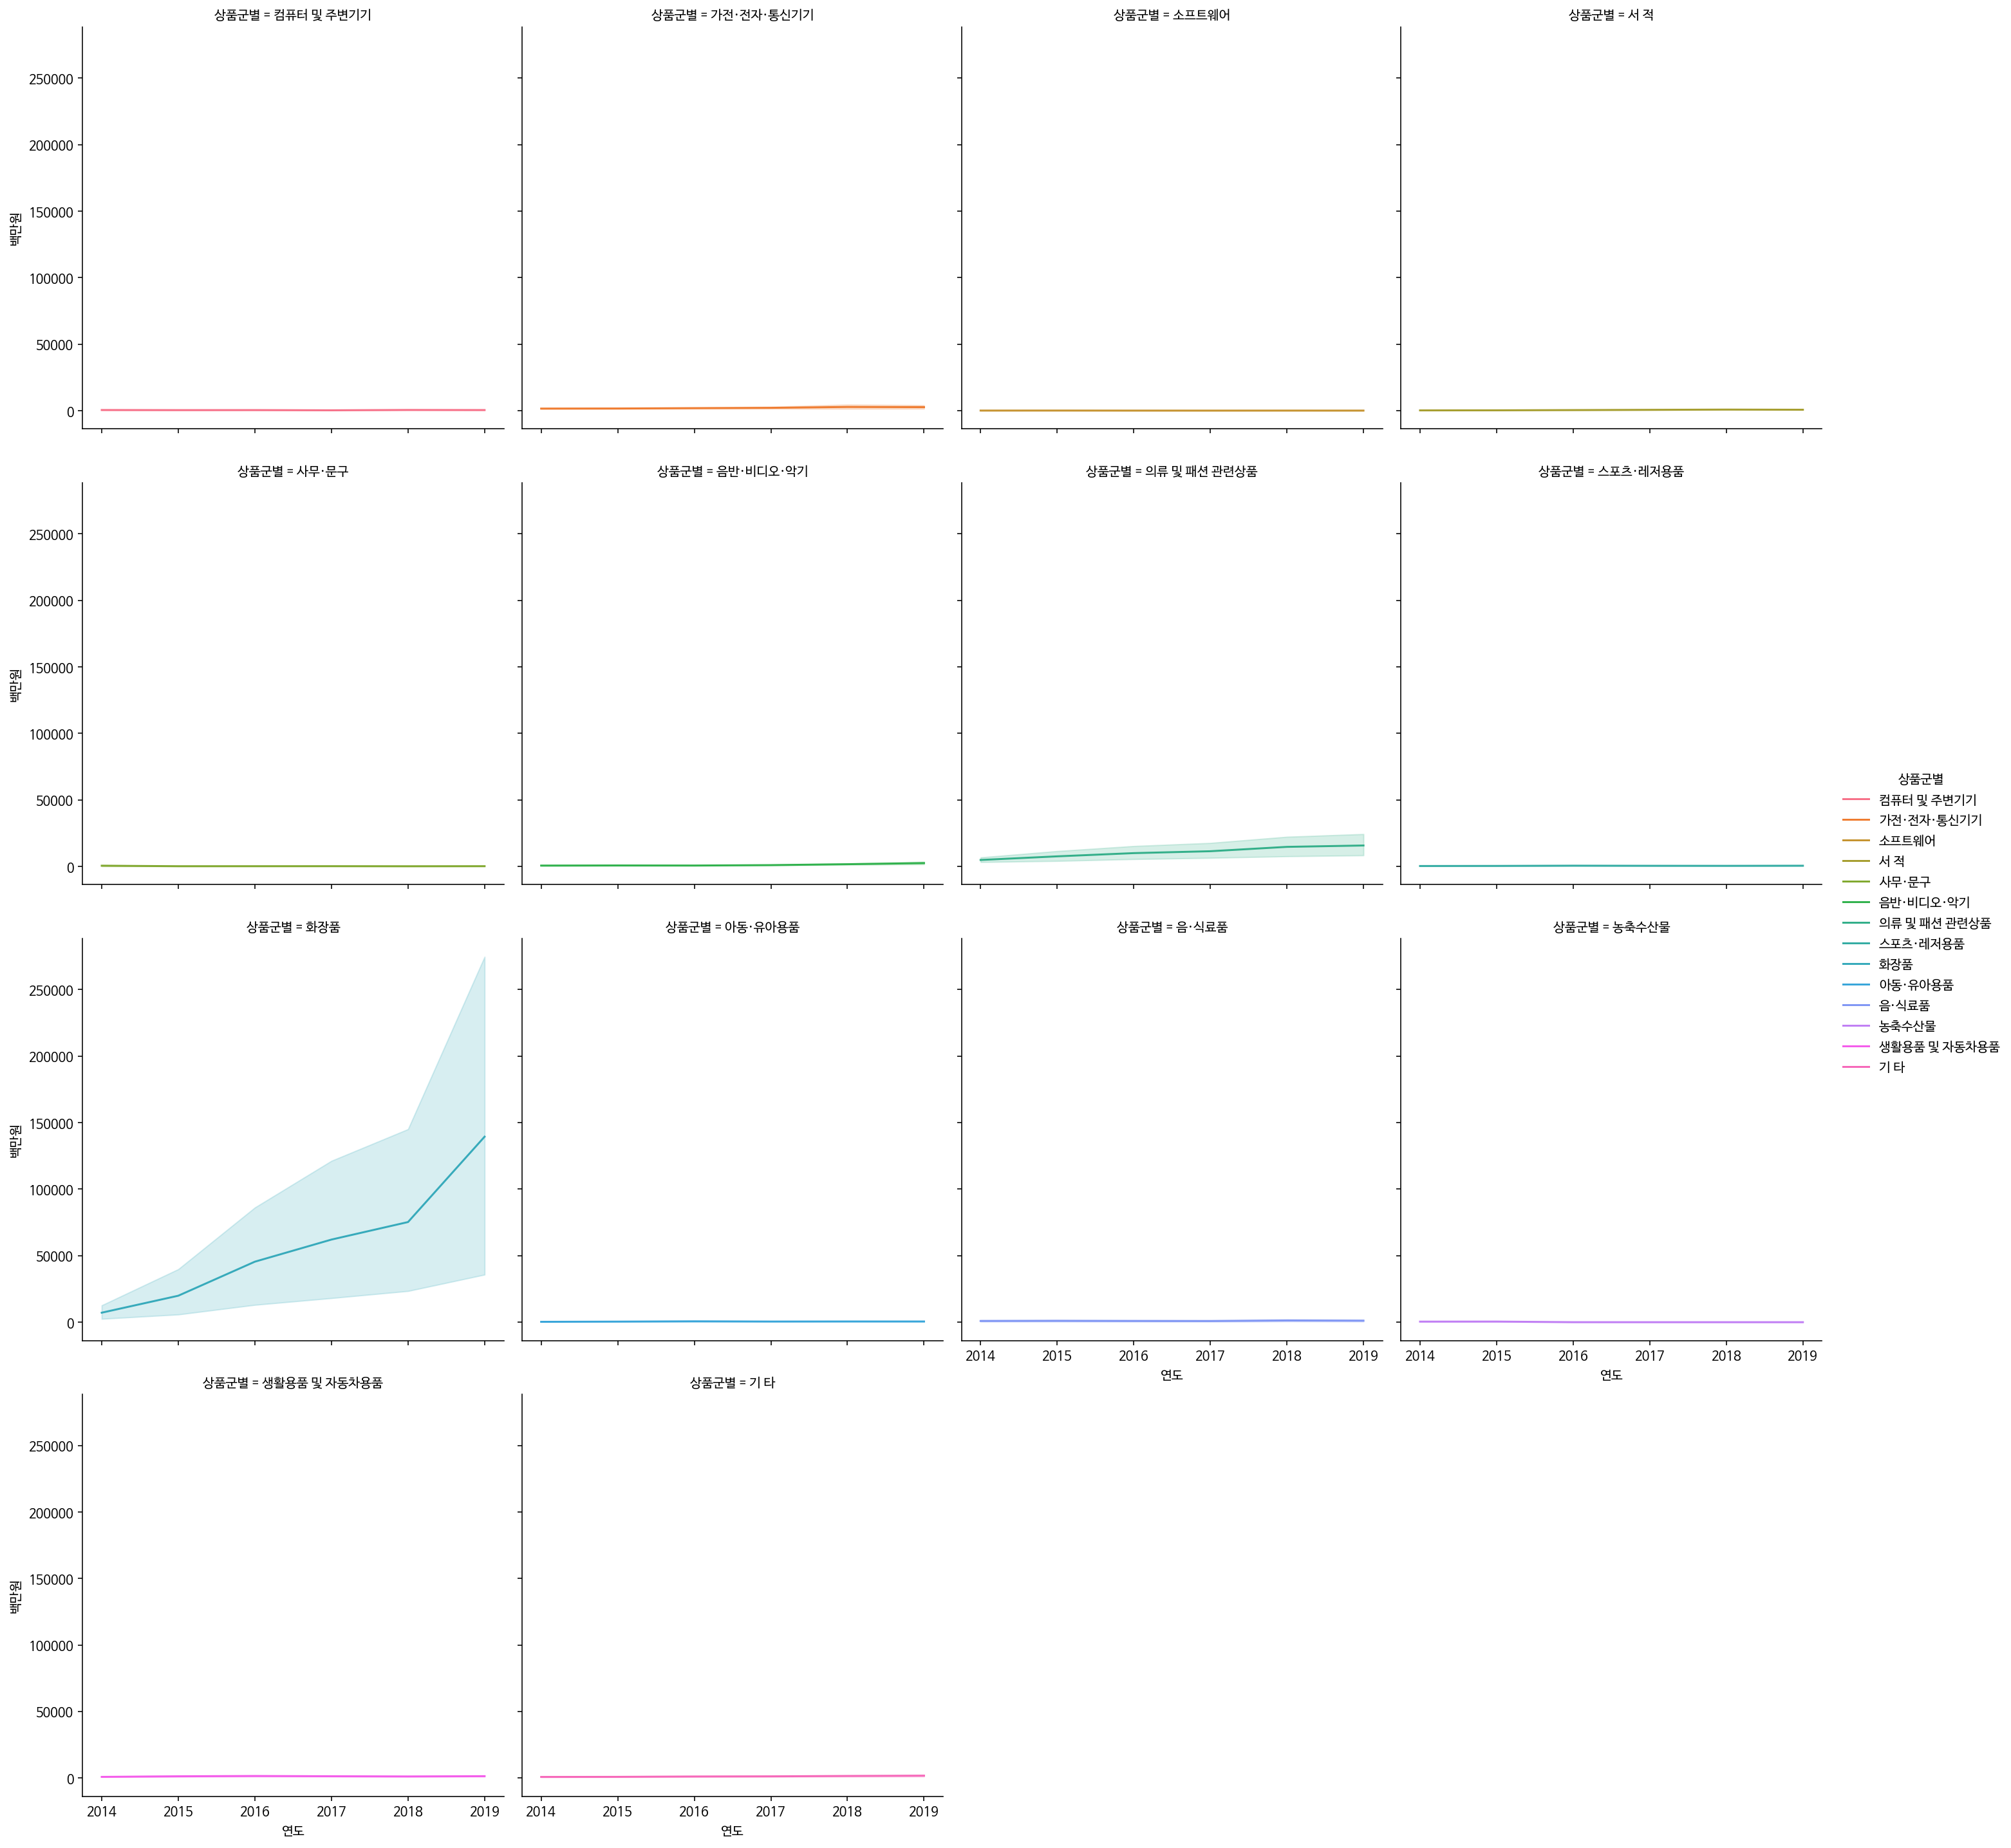

In [24]:
# relplot을 맨 윗줄까지만 작성하면 산점도를 표시함(kind 기본값이 scatter)

sns.relplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별"
            , kind = "line"    # kind 옵션으로 점을 선으로 연결
            , col = "상품군별" # plot을 상품군별로 따로 그림
            , col_wrap = 4     # 숫자 만큼의 컬럼을 갖는 subplot 그림
            )

# 여전히 화장품이 너무 많아서 다른 것들 분간이 안됨 -> 화장품 제외하고 시각화

In [25]:
# isin을 사용해 화장품을 제외하고 df_sub 생성

df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()

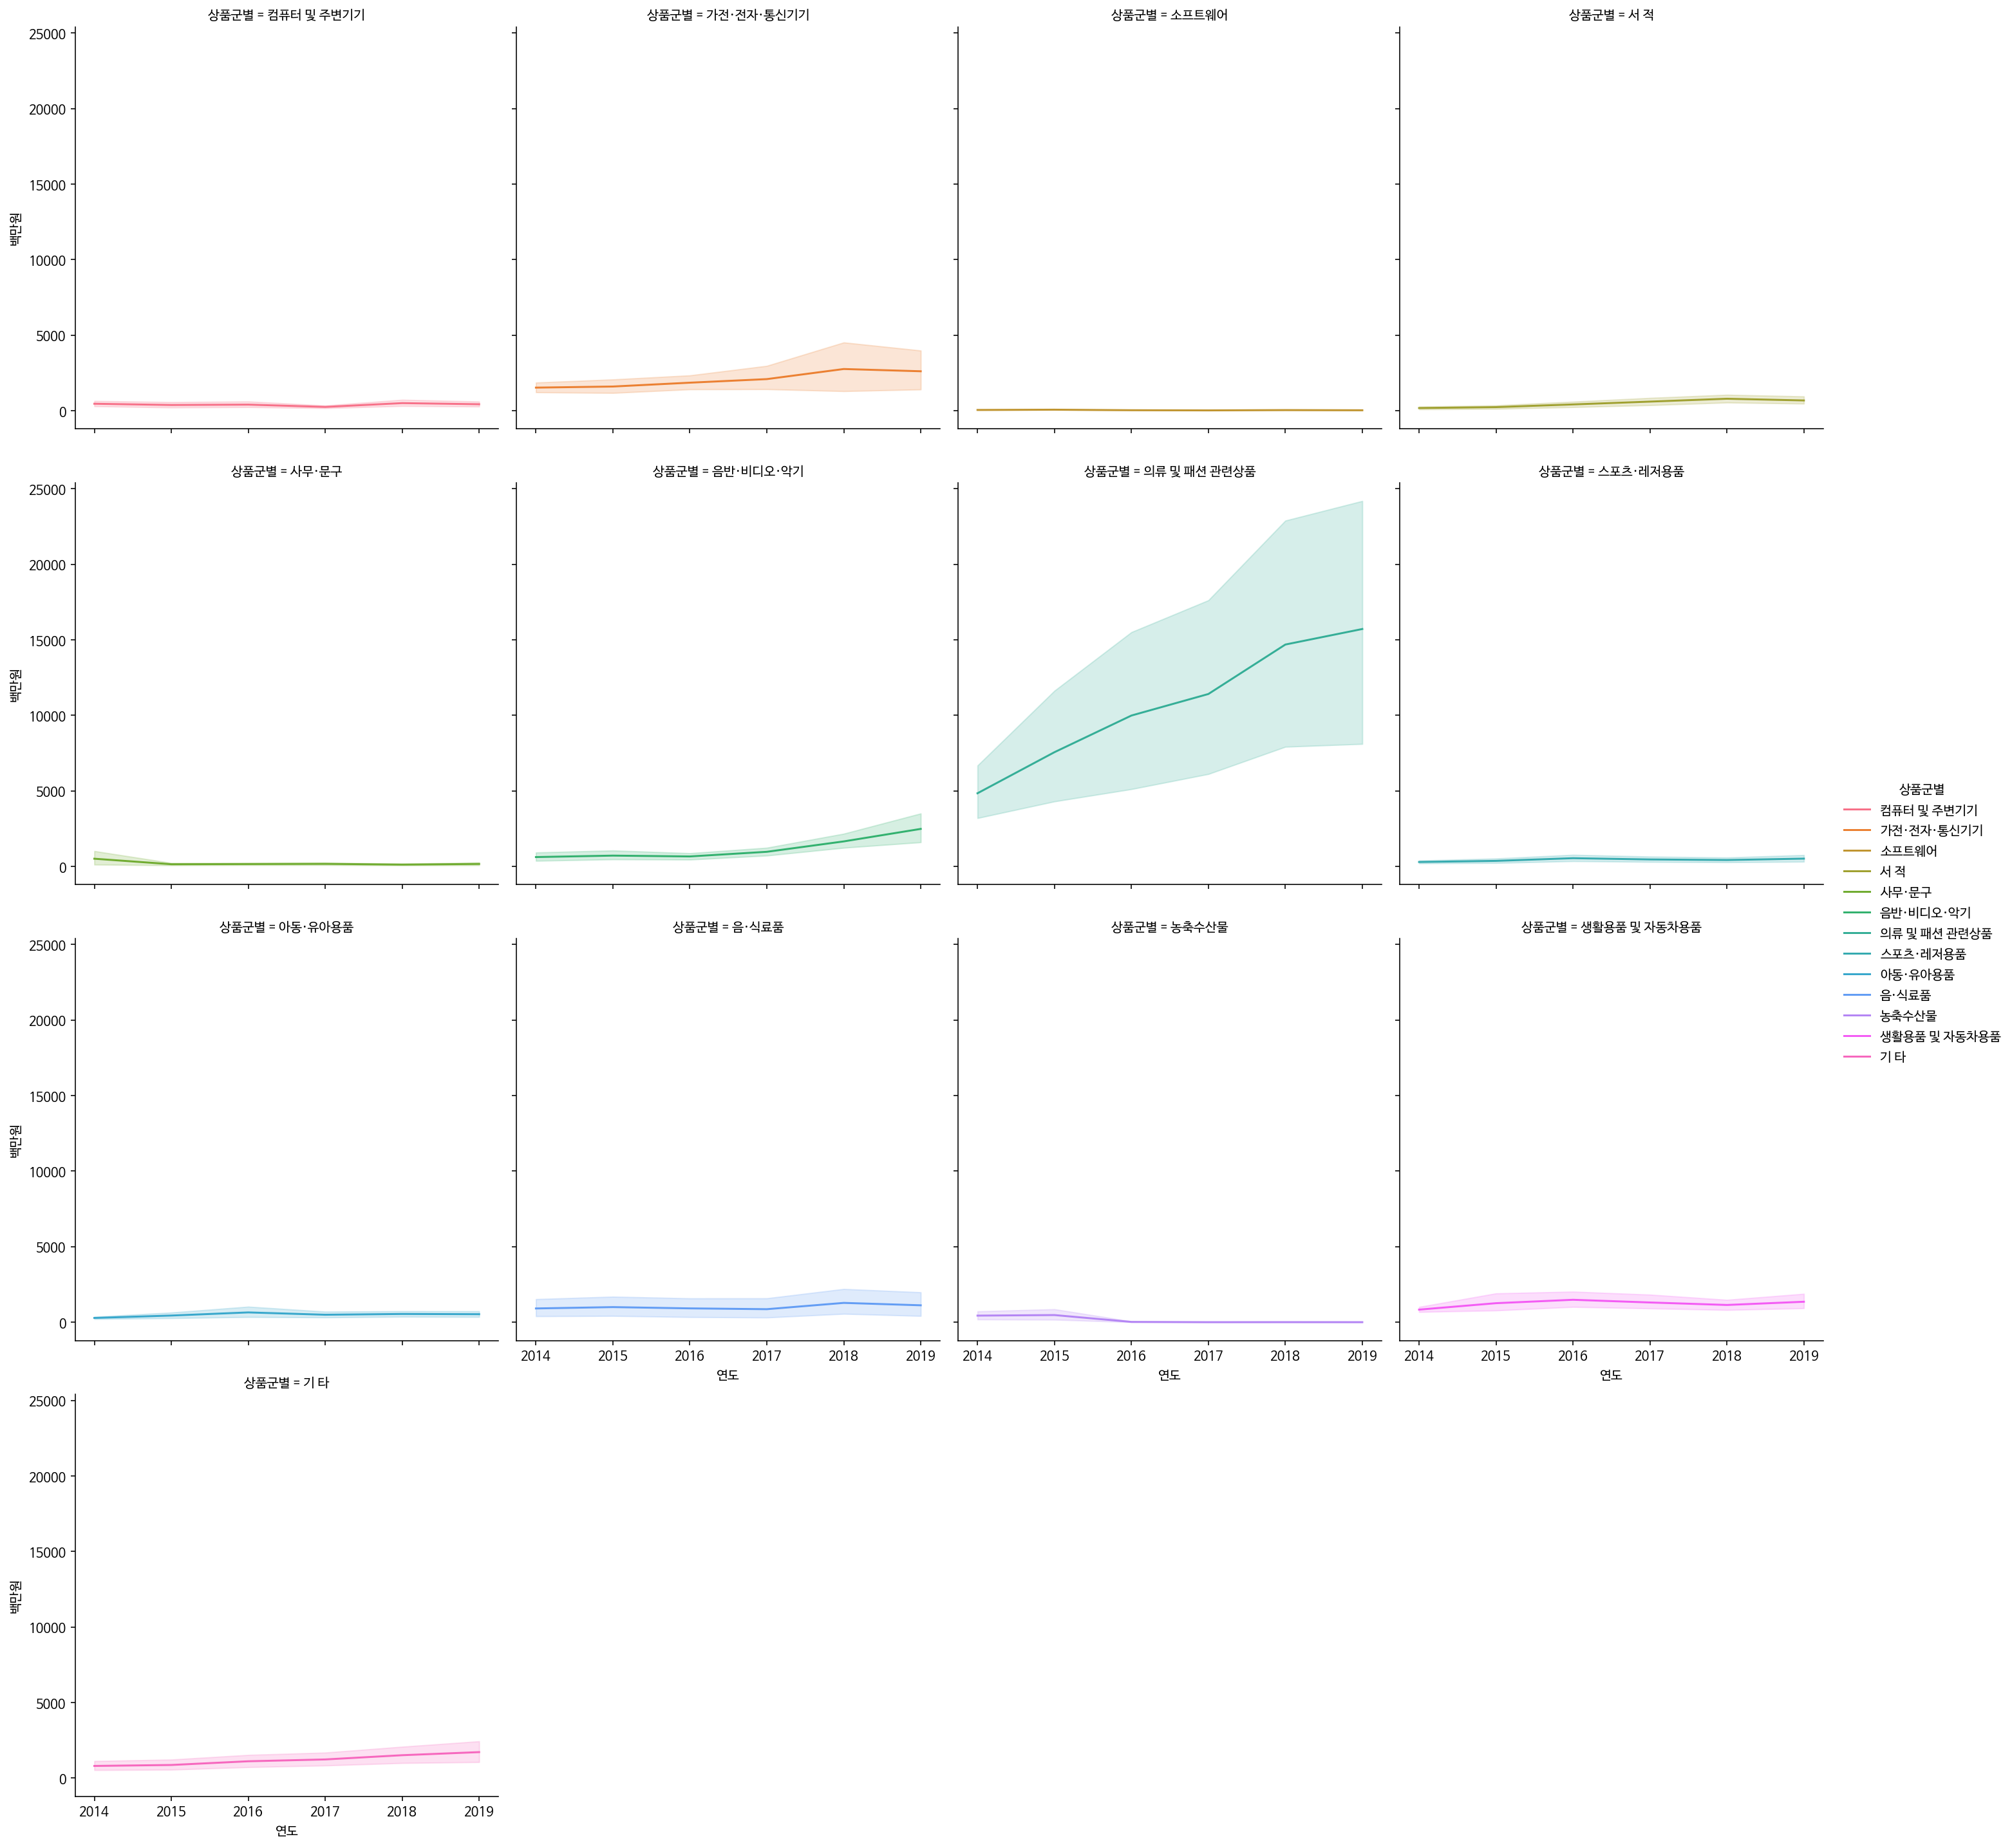

In [26]:
# relplot으로 data만 df_sub로 넣어서 표시

sns.relplot(data = df_sub, x = "연도", y = "백만원", hue = "상품군별"
            , kind = "line", col = "상품군별", col_wrap = 4)

# 의류및패션관련상품이 압도적 -> 다시 제거하고 다시 분석

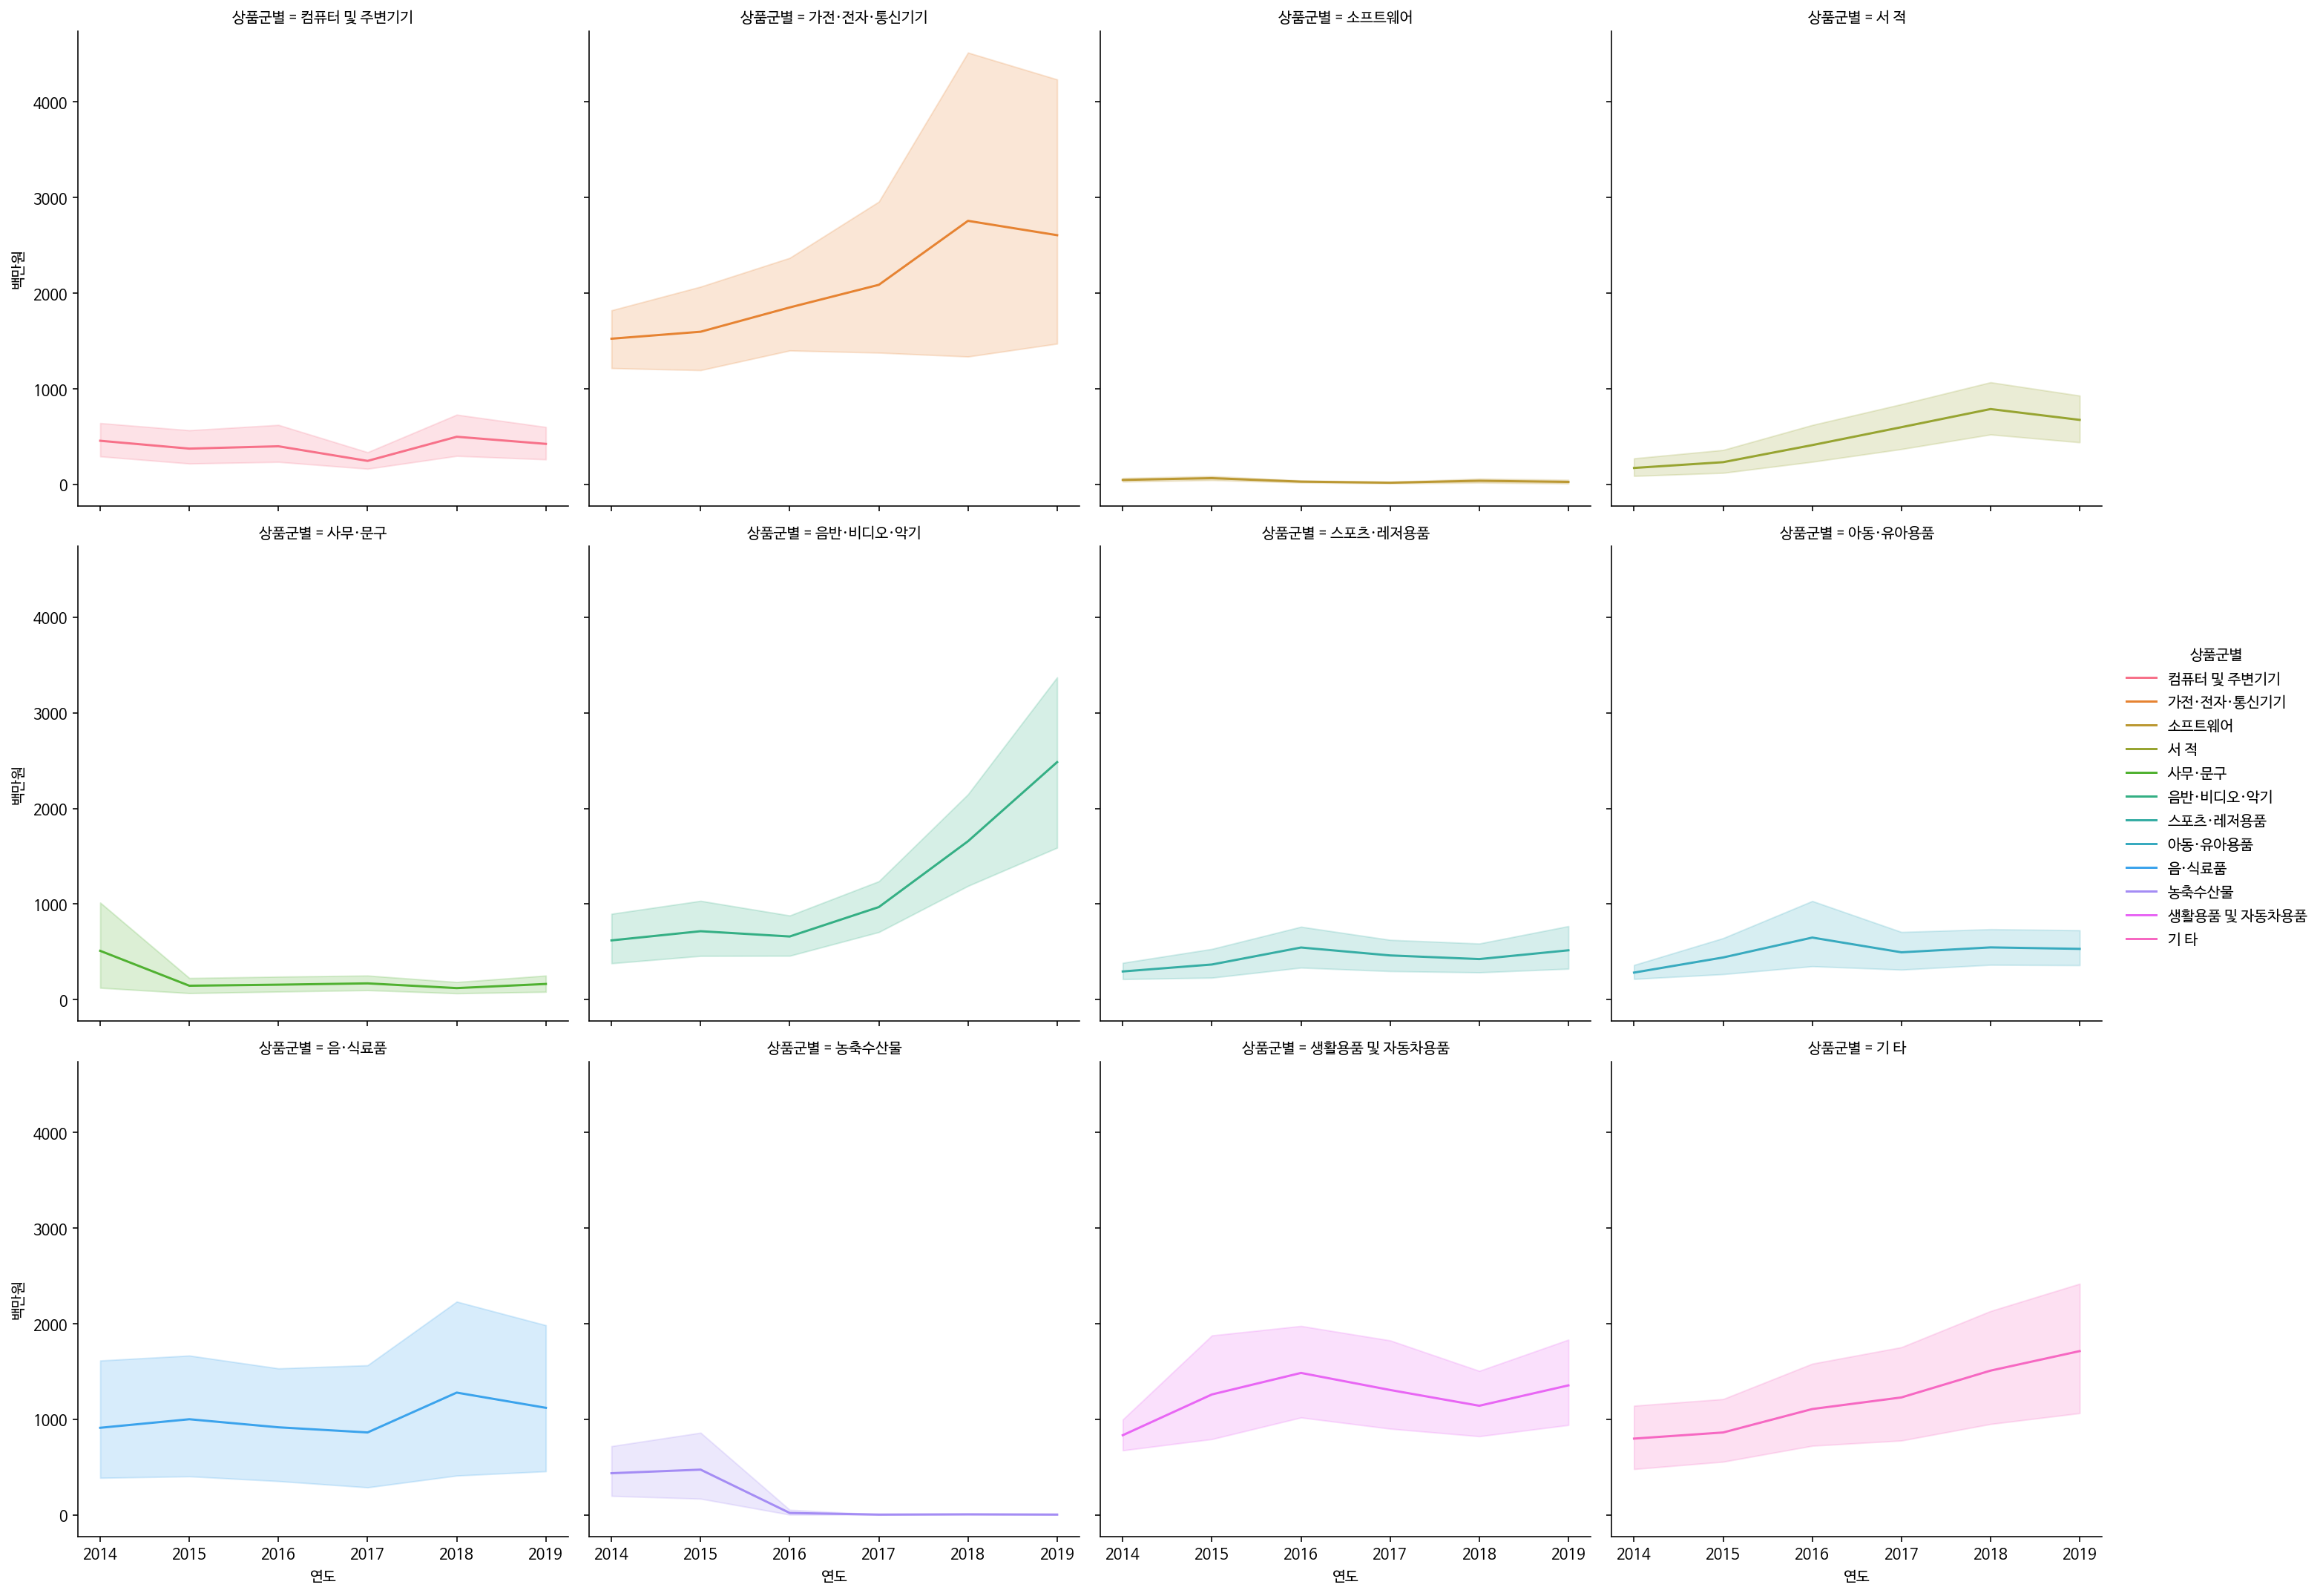

In [27]:
# 상품군별 == [화장품, 의류및패션관련상품] 제외하고 다시 시각화

df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()


sns.relplot(data = df_sub, x = "연도", y = "백만원", hue = "상품군별"
            , kind = "line", col = "상품군별", col_wrap = 4)

## 5.6 - 화장품 온라인 해외 직접 판매액 시각화

In [28]:
# df_cosmetic 변수에 화장품 데이터 할당

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique() # 상품군별 == 화장품인 것들만 추출

array(['화장품'], dtype=object)

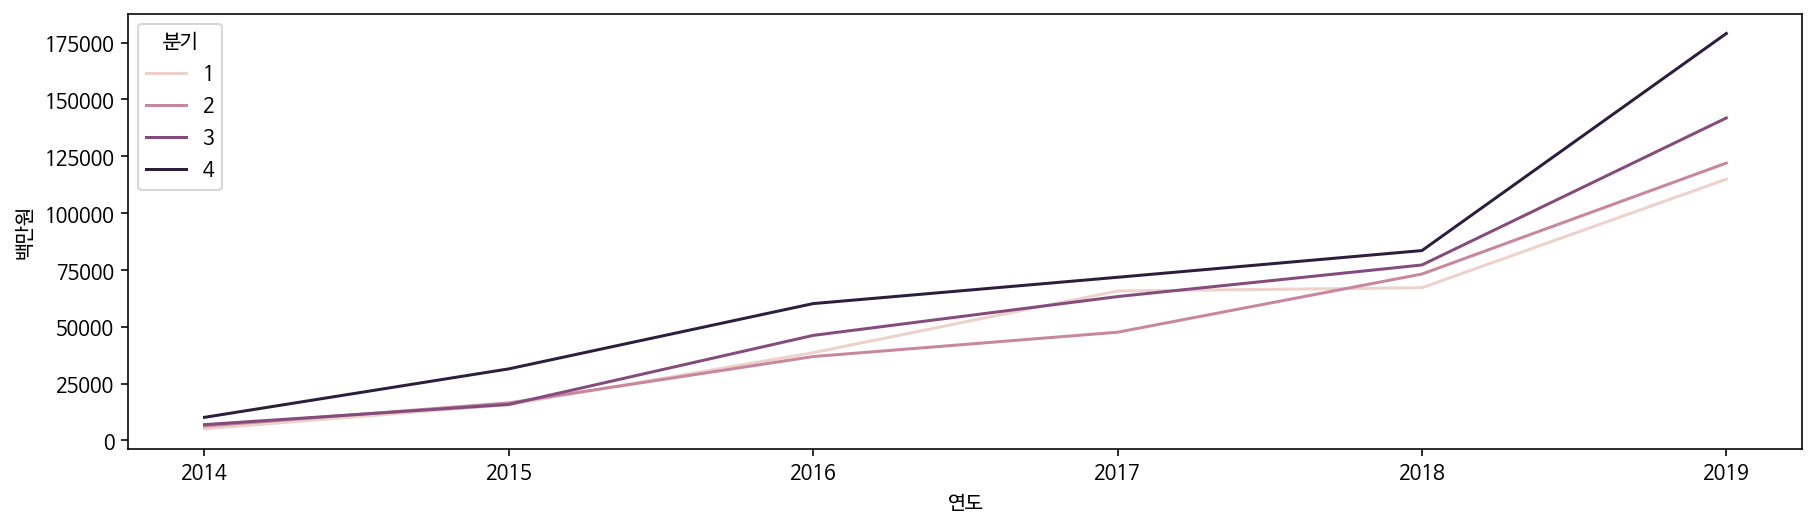

In [29]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현해보기

plt.figure(figsize = (15,4))
sns.lineplot(data = df_cosmetic, x = "연도", y = "백만원", hue = "분기", ci = None)

# 1분기보다 4분기 판매량이 높은데 꾸준히 증가하고 있기 때문으로 추정

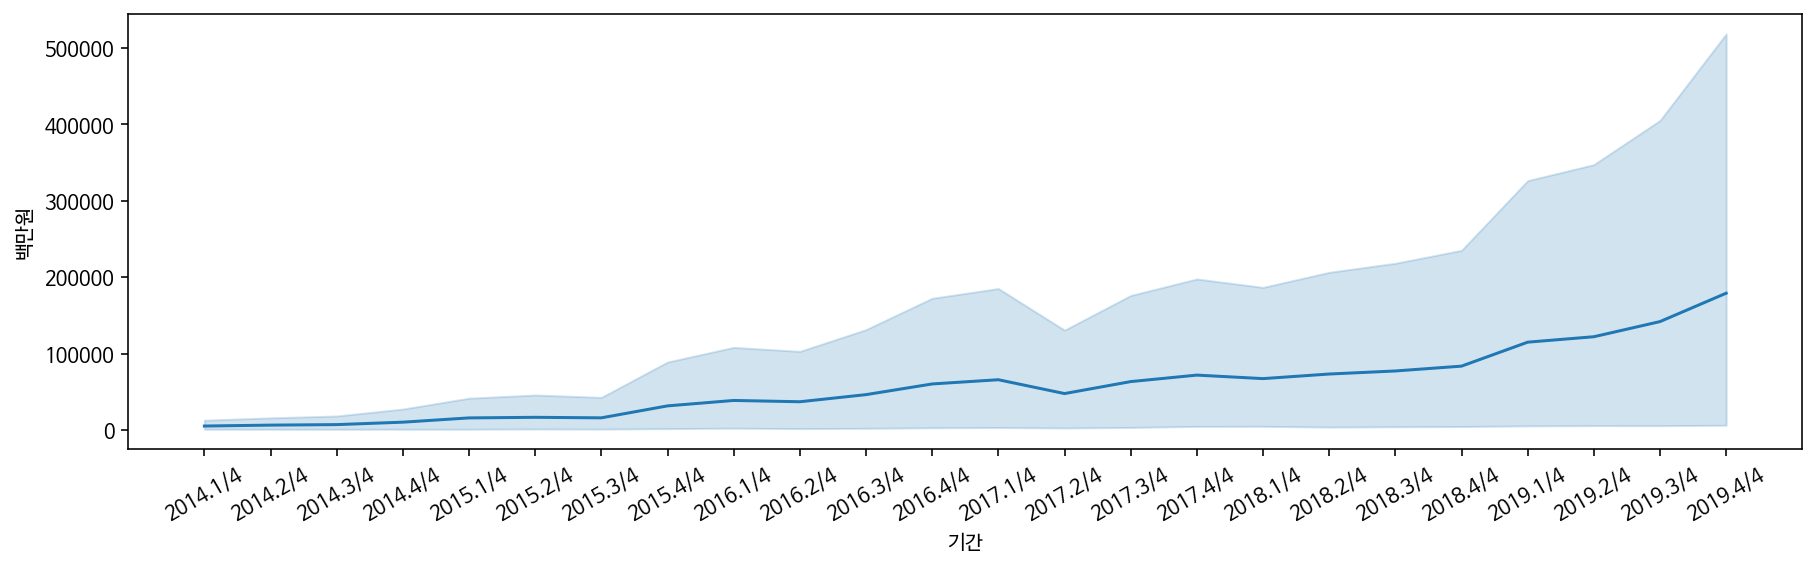

In [30]:
# 연도x 기간o 기준의 시각화

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30) # x축 글씨 기울이기
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원")

# 시간에 따라 꾸준히 성장하는 추세

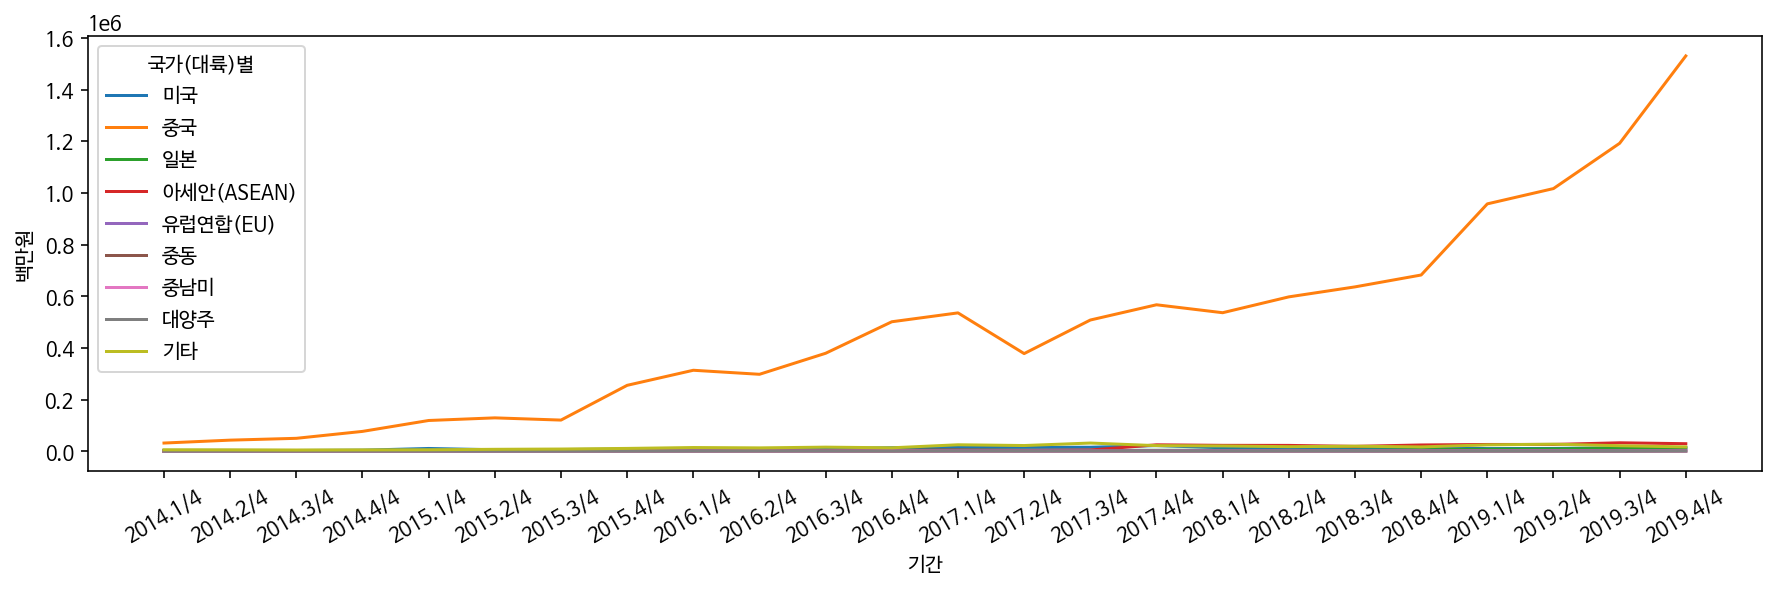

In [31]:
# 국가(대륙)별 구분

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30) # x축 글씨 기울이기
sns.lineplot(data = df_cosmetic, x = "기간", y = "백만원", hue = "국가(대륙)별")

# 다들 고만고만한데, 중국 판매량이 압도적

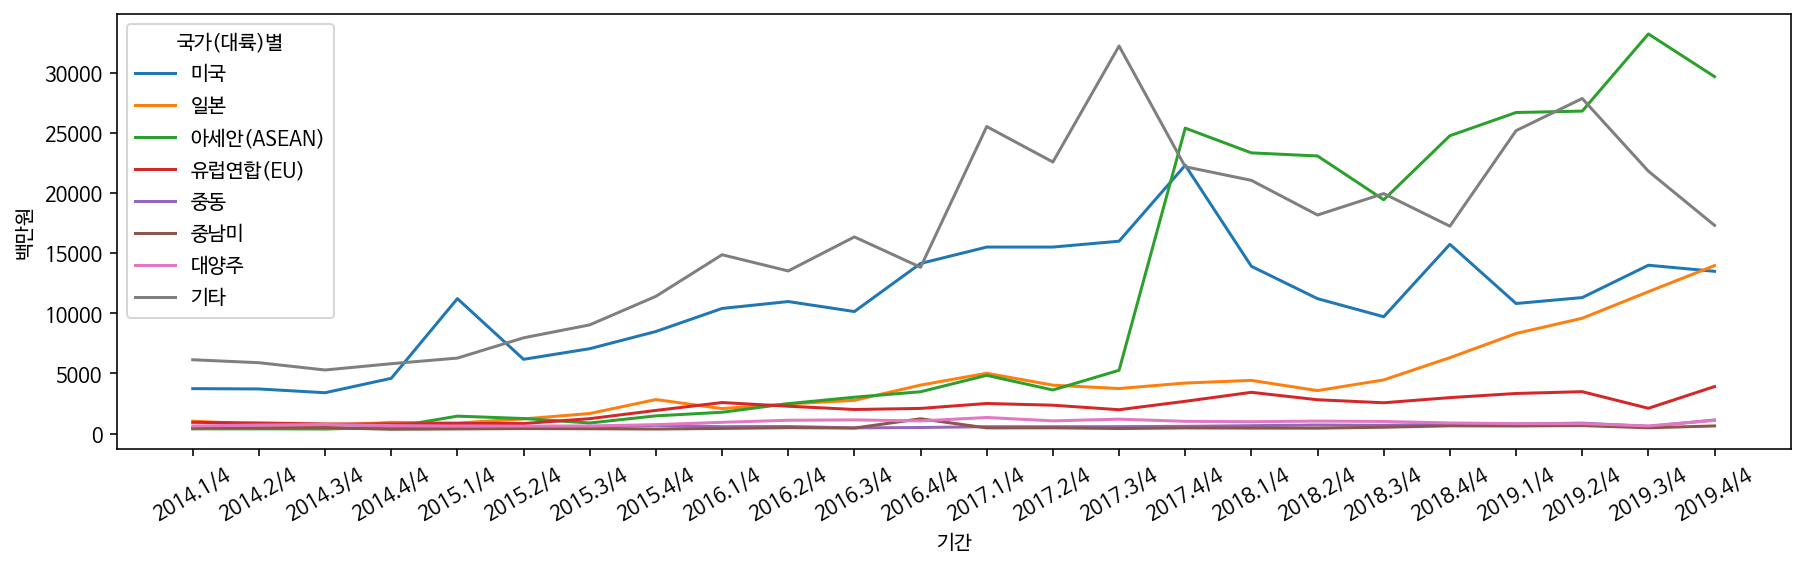

In [32]:
# 국가(대륙)별 구분에서 중국 제외하고 시각화

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30) # x축 글씨 기울이기
sns.lineplot(data = df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x = "기간", y = "백만원", hue = "국가(대륙)별")

# 아세안, 기타, 일본, 미국 순
# 아세안은 2017년 3분기 기점으로 급증
# 일본은 천천히 성장

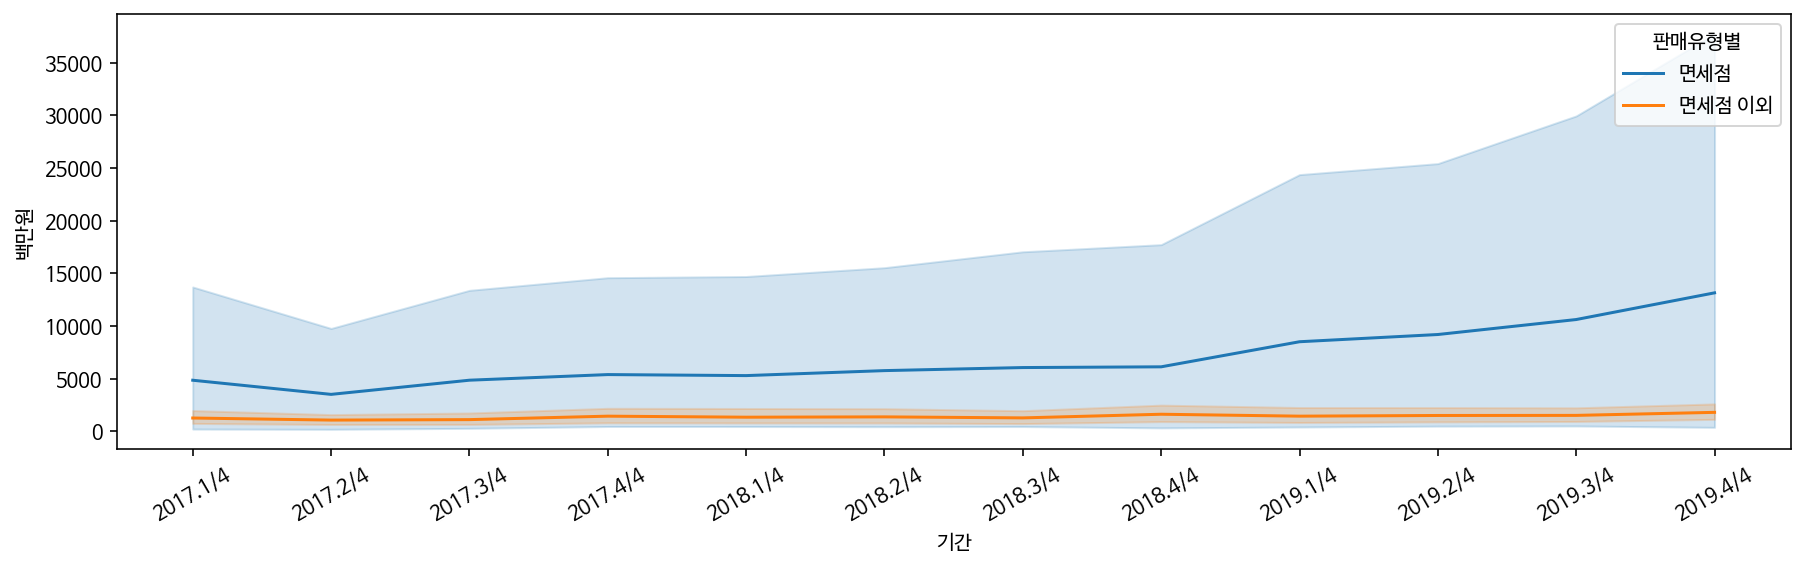

In [33]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상 표시

df_sub = df[df["판매유형별"] != "계"].copy()
# 판매유형별로 시각화해야 하므로 계는 제외

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_sub, x = "기간", y = "백만원", hue = "판매유형별")

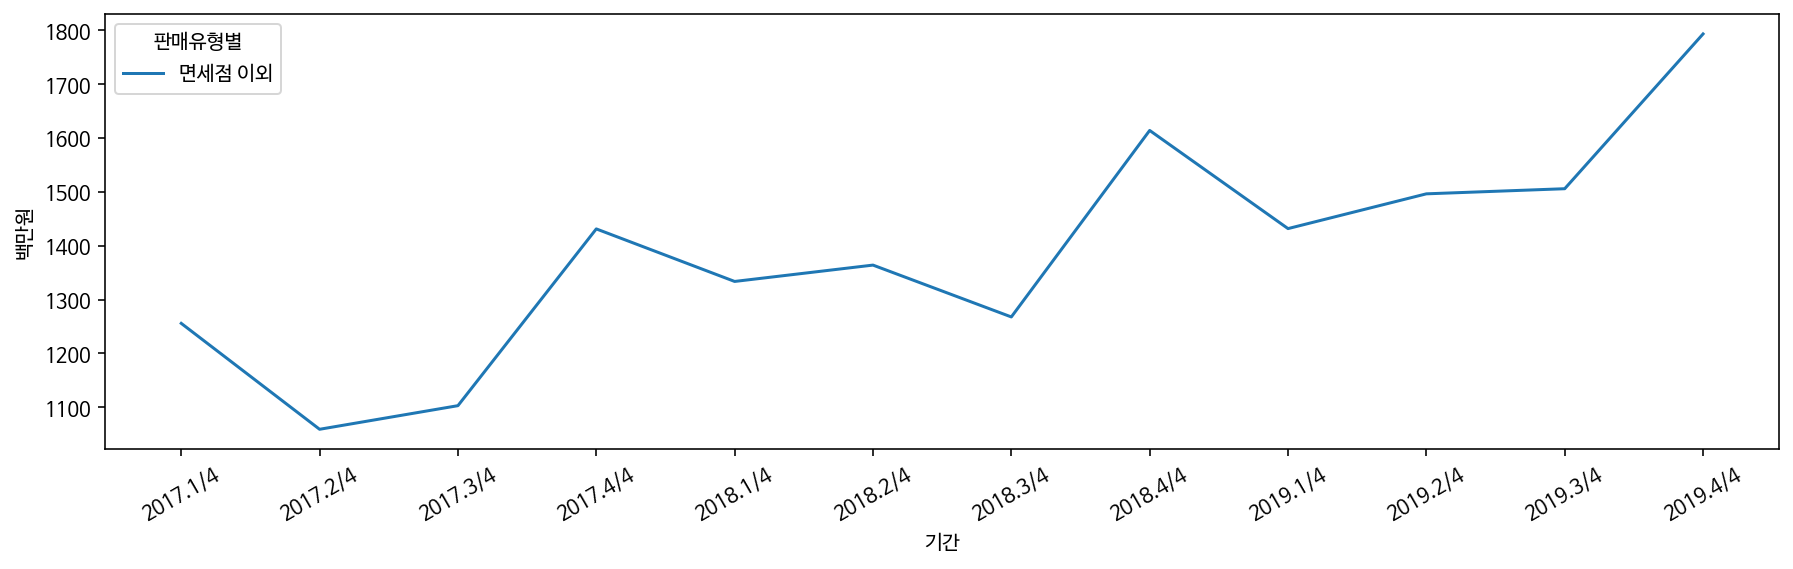

In [34]:
# 면세점 이외만 시각화

df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_sub, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

## 5.7 - 패션 의류 온라인 해외 직접 판매액 시각화

In [40]:
# df_fashion이라는 변수에 의류 데이터만 가져와 담기

df_fashion = df[df["상품군별"] == "의류 및 패션 관련상품"].copy()
df_fashion.sample(10)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
5198,유럽연합(EU),의류 및 패션 관련상품,면세점 이외,2016.4/4,NaN,2016,4
5558,일본,의류 및 패션 관련상품,면세점 이외,2017.1/4,20135.0,2017,1
1327,기타,의류 및 패션 관련상품,면세점,2014.3/4,NaN,2014,3
8616,미국,의류 및 패션 관련상품,계,2018.4/4,13658.0,2018,4
4657,일본,의류 및 패션 관련상품,면세점,2016.3/4,NaN,2016,3
8528,기타,의류 및 패션 관련상품,면세점 이외,2018.3/4,880.0,2018,3
5242,중동,의류 및 패션 관련상품,면세점,2016.4/4,NaN,2016,4
6817,미국,의류 및 패션 관련상품,면세점,2017.4/4,129.0,2017,4
3937,중남미,의류 및 패션 관련상품,면세점,2016.1/4,NaN,2016,1
336,중남미,의류 및 패션 관련상품,계,2014.1/4,271.0,2014,1


In [41]:
# 판매유형별 == 계만 추출

df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.sample(10)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
7356,일본,의류 및 패션 관련상품,계,2018.1/4,34571.0,2018,1
9831,대양주,의류 및 패션 관련상품,계,2019.2/4,633.0,2019,2
1911,중국,의류 및 패션 관련상품,계,2015.1/4,29737.0,2015,1
9381,대양주,의류 및 패션 관련상품,계,2019.1/4,627.0,2019,1
9651,아세안(ASEAN),의류 및 패션 관련상품,계,2019.2/4,7278.0,2019,2
3801,아세안(ASEAN),의류 및 패션 관련상품,계,2016.1/4,5600.0,2016,1
3846,유럽연합(EU),의류 및 패션 관련상품,계,2016.1/4,1319.0,2016,1
2586,중남미,의류 및 패션 관련상품,계,2015.2/4,177.0,2015,2
5916,미국,의류 및 패션 관련상품,계,2017.2/4,11091.0,2017,2
7896,유럽연합(EU),의류 및 패션 관련상품,계,2018.2/4,1056.0,2018,2


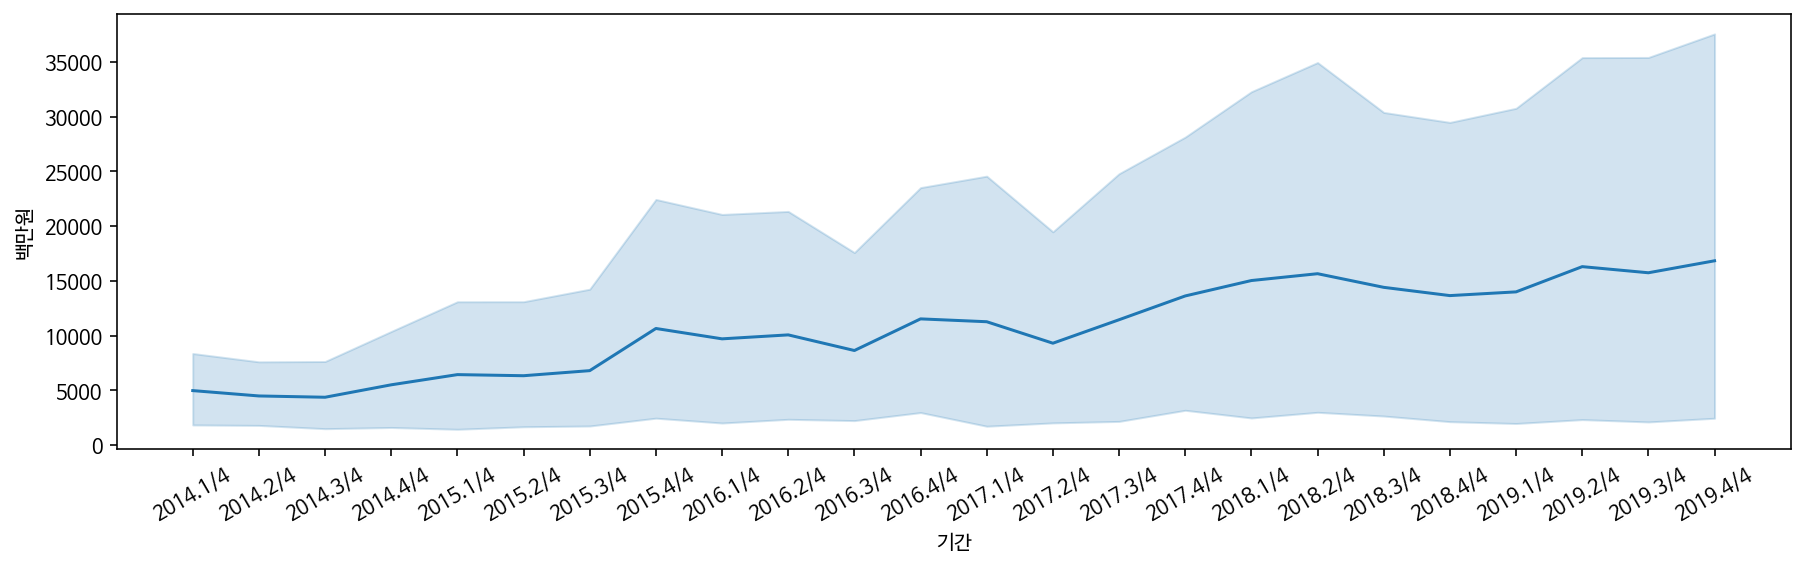

In [46]:
# 의류 및 패션 관련상품 판매액에 대한 기간별 금액 데이터 시각화

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion, x = "기간", y = "백만원")

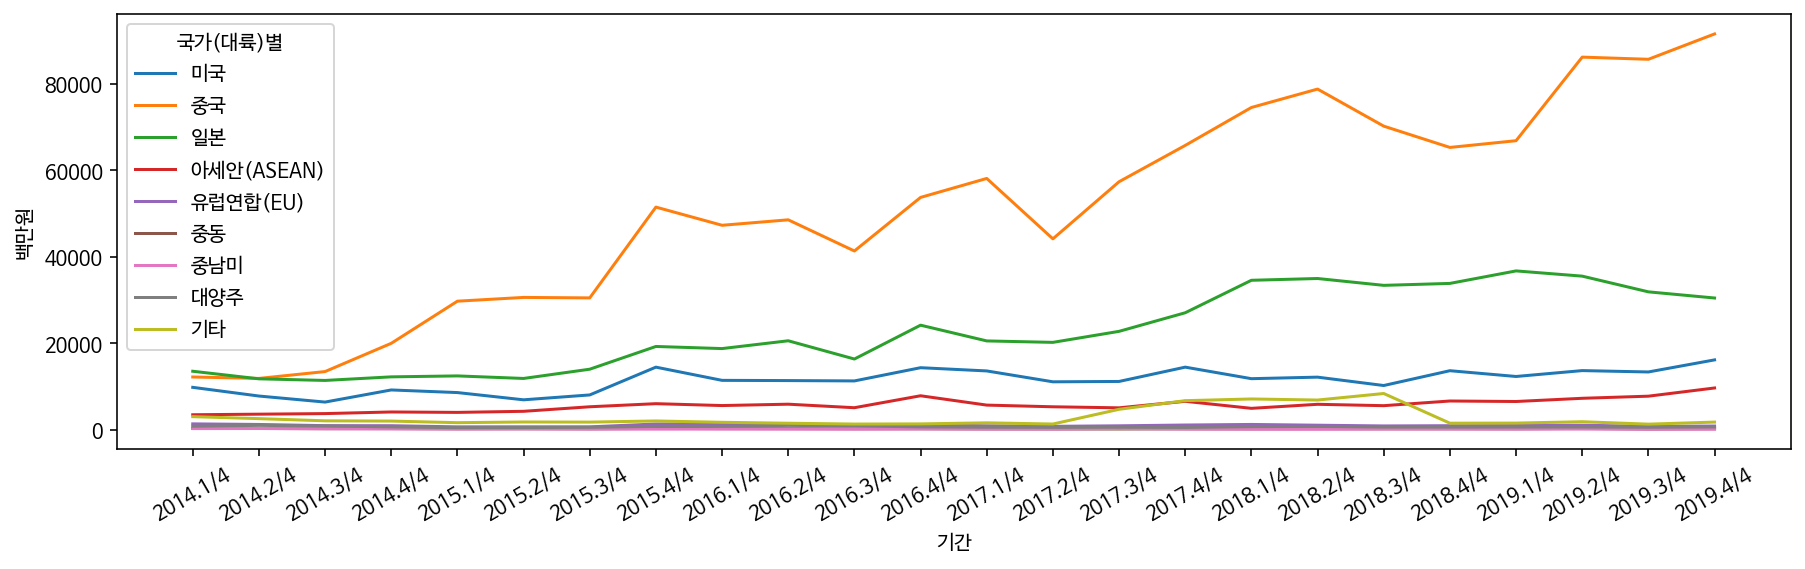

In [45]:
# 국가(대륙)별로 색구분

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion, x = "기간", y = "백만원", hue = "국가(대륙)별")

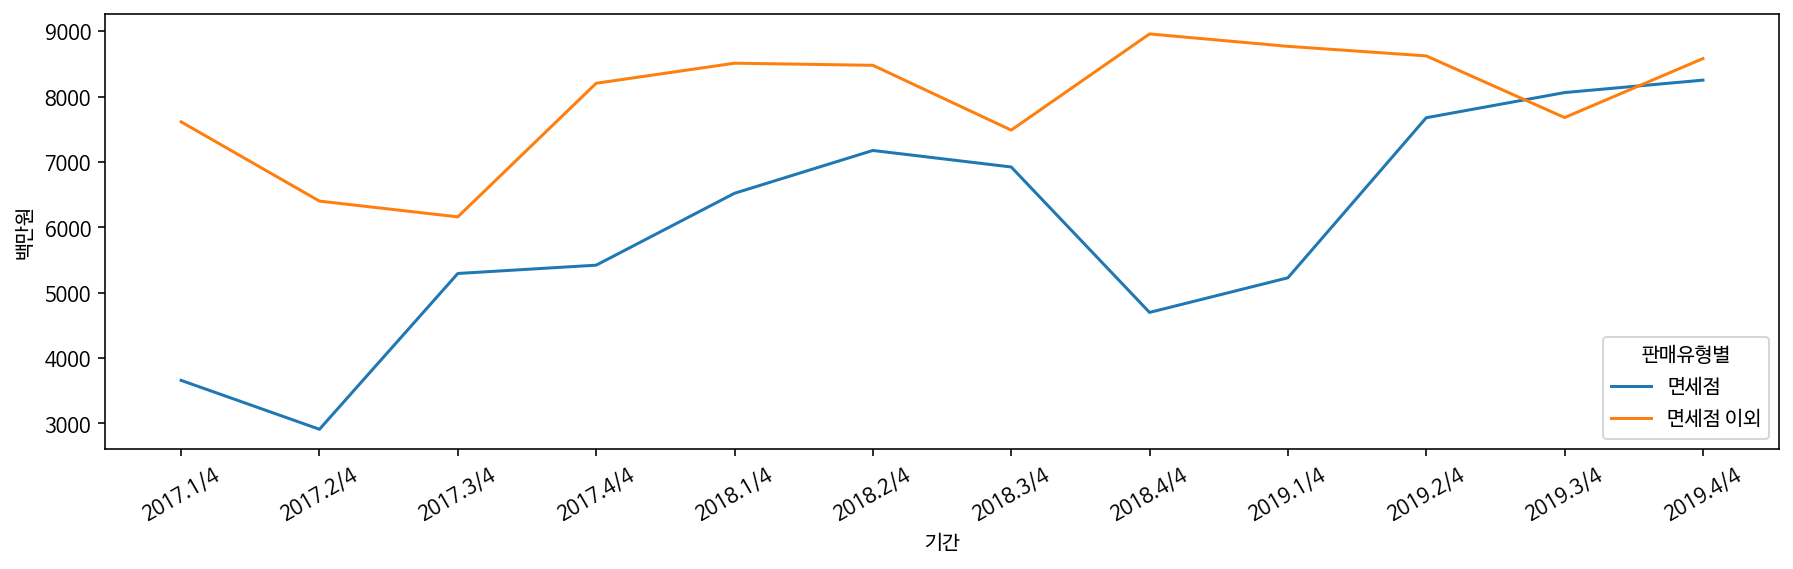

In [49]:
# 판매유형별로 색구분

df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30)
sns.lineplot(data = df_fashion2, x = "기간", y = "백만원", hue = "판매유형별", ci = None)

## 5.8 - 데이터 pivot table로 집계하고 heatmap 으로 표현하기

In [54]:
# pivot table로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기

result = df_fashion.pivot_table(index = "국가(대륙)별", columns = "연도", values = "백만원", aggfunc = "sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


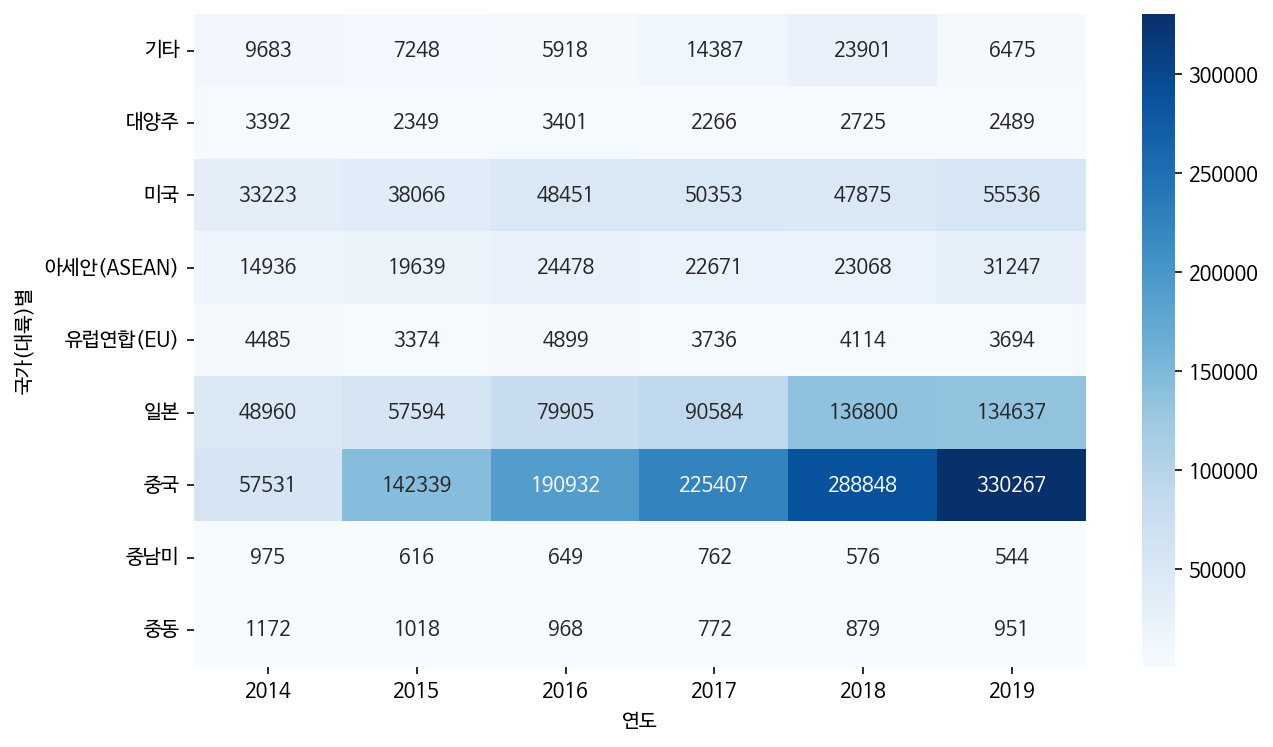

In [61]:
# 위의 표는 한눈에 알아보긴 어려움 -> heatmap으로 시각화

plt.figure(figsize = (10,6))
sns.heatmap(result
            , cmap = "Blues" # 시각화의 색깔
            , annot = True   # heatmap에 숫자로 값 표시
            , fmt = ".0f"    # 숫자의 형식 지정
            )

## 5.9 - 전체상품군별 시각화

* 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

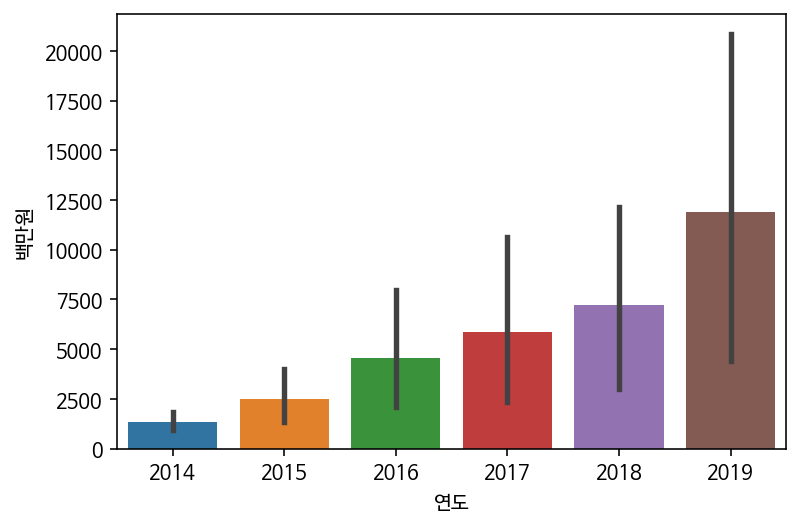

In [64]:
# 판매유형별 == "계"인 데이터만 모은 df_total에서 연도별 합계 금액 시각화

sns.barplot(data = df_total, x = "연도", y = "백만원")

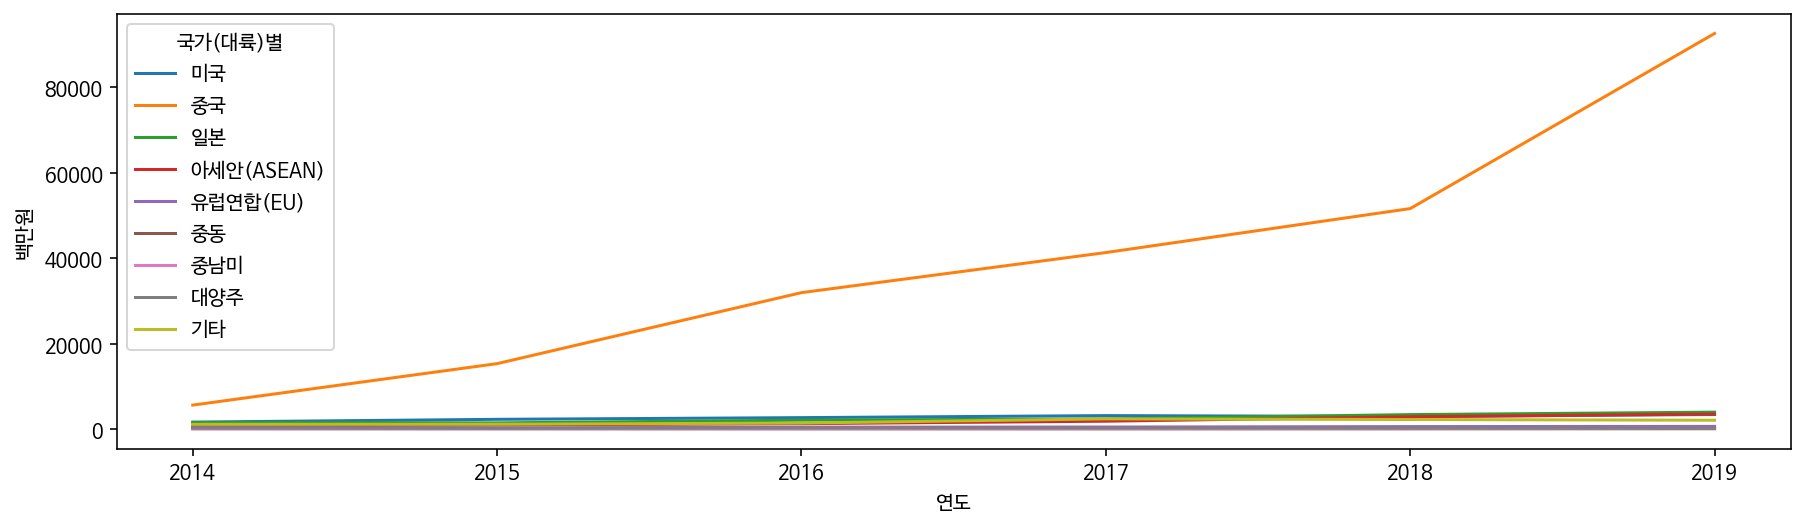

In [68]:
# 연도별 판매액을 그리고 국가대륙별로 색구분

plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "국가(대륙)별", ci = None)

# 전반적으로 모두 증가하는 추세이나, 중국이 압도적

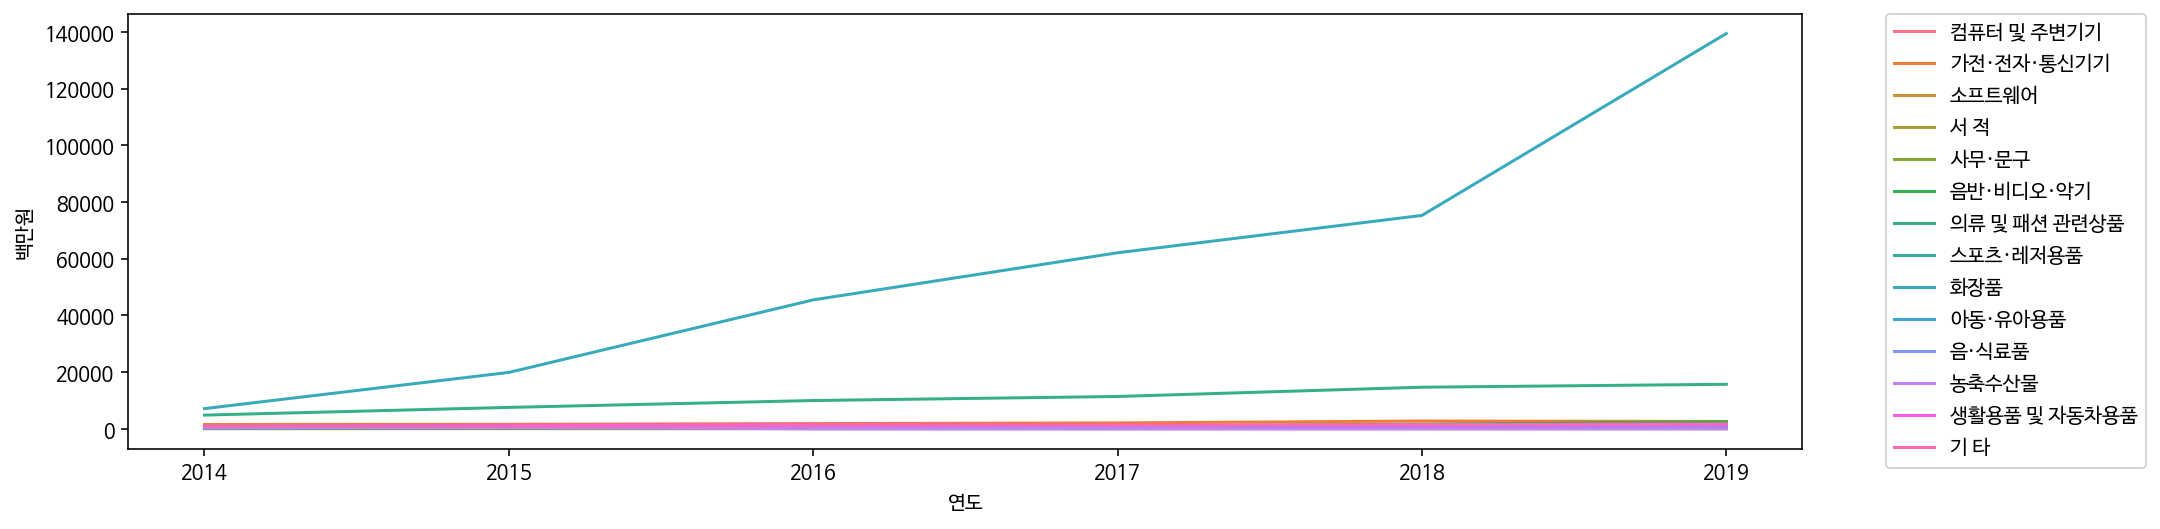

In [70]:
# 연도별 판매액을 그리고 상품군별로 색구분

plt.figure(figsize = (15,4))
sns.lineplot(data = df_total, x = "연도", y = "백만원", hue = "상품군별", ci = None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # legend 위치 조정